## Vanilla Call

In [4]:
import numpy as np
import json

with open('data/old_data_2024-03-31/vanilla_call_test_2024-03-14 13:52:11.json', 'r') as f:
    data = json.load(f)

strike_prices = list(data.keys())
estimated_values = []
exact_values = []
conf_int = []
y_err = []
for key, value in data.items():
    curr_results = value['results']
    curr_exact_value = curr_results[0][0]
    curr_estimated_value = curr_results[0][1]
    curr_lower_bound = curr_results[0][2]
    curr_upper_bound=  curr_results[0][3]
    estimated_values.append(curr_estimated_value)
    exact_values.append(curr_exact_value)
    conf_int.append([curr_lower_bound, curr_upper_bound])
    y_err.append([curr_estimated_value - curr_lower_bound, curr_upper_bound - curr_estimated_value])

for i in range(len(strike_prices)):
    print(strike_prices[i], end='&')
    print('{:.6f}'.format(exact_values[i]), end='&')
    print('{:.6f}'.format(estimated_values[i]), end='&')
    print('{:.6f}'.format(conf_int[i][1]), end='&')
    print('{:.6f}'.format(conf_int[i][0]), end='\\\\')
    print()
# print([float(x) for x in strike_prices])

1.33&0.679331&0.679036&0.680195&0.677876\\
1.45&0.559664&0.559867&0.561016&0.558718\\
1.57&0.442470&0.441612&0.448517&0.434707\\
1.69&0.329094&0.328816&0.335622&0.322009\\
1.81&0.231919&0.232101&0.237502&0.226700\\
1.93&0.146172&0.147515&0.148352&0.146678\\
2.05&0.089769&0.090915&0.091357&0.090473\\
2.17&0.046210&0.047473&0.048274&0.046673\\
2.29&0.024531&0.025329&0.025692&0.024967\\
2.41&0.010191&0.010727&0.011324&0.010129\\


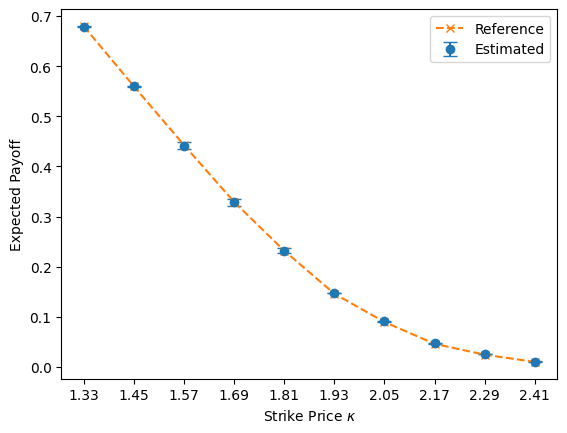

In [7]:
import matplotlib.pyplot as plt

plt.errorbar(strike_prices, estimated_values, yerr=np.array(y_err).T, fmt='o', capsize=5, label='Estimated')
plt.plot(strike_prices, exact_values, 'x--', label="Reference")
plt.xlabel(r'Strike Price $\kappa$')
plt.ylabel("Expected Payoff")
plt.legend()

## Basket Call

In [49]:
import numpy as np
import json

with open('data/2024-04-08/basket_call_new/basket_call_new_2024-04-08-10:10:54.json', 'r') as f:
    data = json.load(f)

strike_prices = [str(round(float(x),2)) for x in data.keys()]
estimated_values = []
exact_values = []
conf_int = []
y_err = []
false_counter = 0
strike_counter = 0
strike_counter = [False for i in range(len(strike_prices))]
for key, value in data.items():
    curr_results = value['results']
    curr_exact_value = curr_results[0][0]
    best_int_index = 0
    best_int = curr_results[0][3] - curr_results[0][2]
    for i in range(5):
        curr_int = curr_results[i][3] - curr_results[i][2]
        if  curr_results[i][3] > curr_exact_value and curr_results[i][2] < curr_exact_value:
            best_int = curr_int
            best_int_index = i
            strike_counter[strike_prices.index(key)] = True
        else:
            false_counter += 1
    curr_estimated_value = curr_results[best_int_index][1]
    curr_lower_bound = curr_results[best_int_index][2]
    curr_upper_bound=  curr_results[best_int_index][3]
    estimated_values.append(curr_estimated_value)
    exact_values.append(curr_exact_value)
    conf_int.append([curr_lower_bound, curr_upper_bound])
    y_err.append([curr_estimated_value - curr_lower_bound, curr_upper_bound - curr_estimated_value])

print(false_counter/(len(list(data.keys()))*5))
print(strike_counter)

for i in range(len(strike_prices)):
    print(strike_prices[i], end='&')
    print('{:.6f}'.format(exact_values[i]), end='&')
    print('{:.6f}'.format(estimated_values[i]), end='&')
    print('{:.6f}'.format(conf_int[i][1]), end='&')
    print('{:.6f}'.format(conf_int[i][0]), end='\\\\')
    print()

0.66
[True, True, True, True, True, True, True, True, True, True]
3.62&0.426180&0.427173&0.428978&0.425367\\
3.65&0.402294&0.404174&0.416717&0.391631\\
3.68&0.378408&0.379875&0.381912&0.377837\\
3.72&0.346561&0.350753&0.363412&0.338095\\
3.75&0.322675&0.322466&0.335617&0.309314\\
3.78&0.298789&0.300295&0.302123&0.298467\\
3.81&0.279313&0.276816&0.288819&0.264814\\
3.84&0.261602&0.269334&0.281401&0.257267\\
3.87&0.243890&0.246027&0.255811&0.236242\\
3.9&0.226178&0.224180&0.233560&0.214800\\


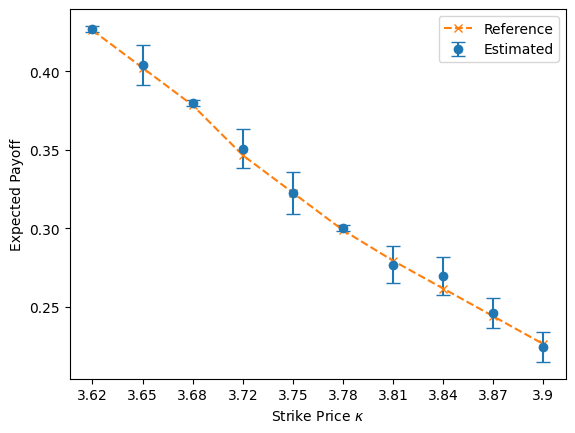

In [50]:
import matplotlib.pyplot as plt

plt.errorbar(strike_prices, estimated_values, yerr=np.array(y_err).T, fmt='o', capsize=5, label='Estimated')
plt.plot(strike_prices, exact_values, 'x--', label="Reference")
plt.xlabel(r'Strike Price $\kappa$')
plt.ylabel("Expected Payoff")
plt.legend()

## Spread Call

In [4]:
import numpy as np
import json

with open('data/2024-04-08/spread_call/spread_call_2024-04-08-10:14:32.json', 'r') as f:
    data = json.load(f)

strike_prices = list(data.keys())
estimated_values = []
exact_values = []
conf_int = []
y_err = []
for key, value in data.items():
    curr_results = value['results']
    chosen_sample = 0
    chosen_interval_size = 100
    chosen_sample = 0
    for i in range(5):
        curr_interval_size = curr_results[i][3] - curr_results[i][2]
        if curr_interval_size <= chosen_interval_size:
            chosen_sample = i
            chosen_interval_size = curr_interval_size
    curr_exact_value = curr_results[chosen_sample][0]
    curr_estimated_value = curr_results[chosen_sample][1]
    curr_lower_bound = curr_results[chosen_sample][2]
    curr_upper_bound=  curr_results[chosen_sample][3]
    estimated_values.append(curr_estimated_value)
    exact_values.append(curr_exact_value)
    conf_int.append([curr_lower_bound, curr_upper_bound])
    y_err.append([curr_estimated_value - curr_lower_bound, curr_upper_bound - curr_estimated_value])
    
for i in range(len(strike_prices)):
    print(strike_prices[i], end='&')
    print('{:.6f}'.format(exact_values[i]), end='&')
    print('{:.6f}'.format(estimated_values[i]), end='&')
    print('{:.6f}'.format(conf_int[i][1]), end='&')
    print('{:.6f}'.format(conf_int[i][0]), end='\\\\')
    print()

0.01&0.113612&0.114073&0.117427&0.110719\\
0.015&0.112321&0.110871&0.114230&0.107512\\
0.02&0.111029&0.110382&0.113754&0.107009\\
0.025&0.109738&0.111722&0.115068&0.108376\\
0.03&0.108446&0.107627&0.111224&0.104029\\
0.035&0.107155&0.111047&0.114360&0.107734\\
0.04&0.105863&0.108161&0.111509&0.104813\\
0.045&0.104572&0.105205&0.108559&0.101851\\
0.05&0.103280&0.104425&0.107738&0.101112\\
0.055&0.101989&0.102686&0.106010&0.099362\\


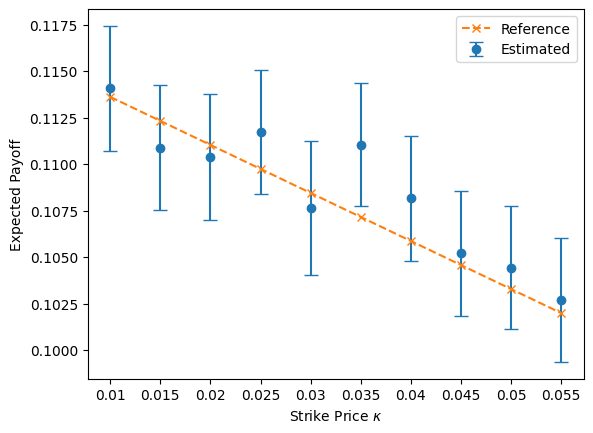

In [5]:
import matplotlib.pyplot as plt

plt.errorbar(strike_prices, estimated_values, yerr=np.array(y_err).T, fmt='o', capsize=5, label='Estimated')
plt.plot(strike_prices, exact_values, 'x--', label="Reference")

plt.xlabel(r'Strike Price $\kappa$')
plt.ylabel("Expected Payoff")
plt.legend()
plt.show()

## Call-on-max

In [22]:
import numpy as np
import json

with open('data/2024-04-01/call_on_max_2024-04-01-16:07:28.json', 'r') as f:
    data = json.load(f)

strike_prices = list(data.keys())
estimated_values = []
exact_values = []
conf_int = []
y_err = []
for key, value in data.items():
    curr_results = value['results']
    curr_exact_value = curr_results[0][0]
    curr_estimated_value = curr_results[0][1]
    curr_lower_bound = curr_results[0][2]
    curr_upper_bound=  curr_results[0][3]
    estimated_values.append(curr_estimated_value)
    exact_values.append(curr_exact_value)
    conf_int.append([curr_lower_bound, curr_upper_bound])
    y_err.append([curr_estimated_value - curr_lower_bound, curr_upper_bound - curr_estimated_value])
    

for i in range(len(strike_prices)):
    print(strike_prices[i], end='&')
    print('{:.6f}'.format(exact_values[i]), end='&')
    print('{:.6f}'.format(estimated_values[i]), end='&')
    print('{:.6f}'.format(conf_int[i][1]), end='&')
    print('{:.6f}'.format(conf_int[i][0]), end='\\\\')
    print()
    

1.33&0.804465&0.805098&0.813612&0.796584\\
1.45&0.684487&0.685483&0.690424&0.680542\\
1.57&0.564676&0.564527&0.565501&0.563553\\
1.69&0.446152&0.447838&0.452069&0.443607\\
1.81&0.332589&0.332920&0.334962&0.330878\\
1.93&0.228361&0.233305&0.238528&0.228082\\
2.05&0.146165&0.145905&0.150115&0.141696\\
2.17&0.081361&0.082417&0.083002&0.081833\\
2.29&0.043842&0.044748&0.045053&0.044444\\
2.41&0.019170&0.019729&0.020016&0.019441\\


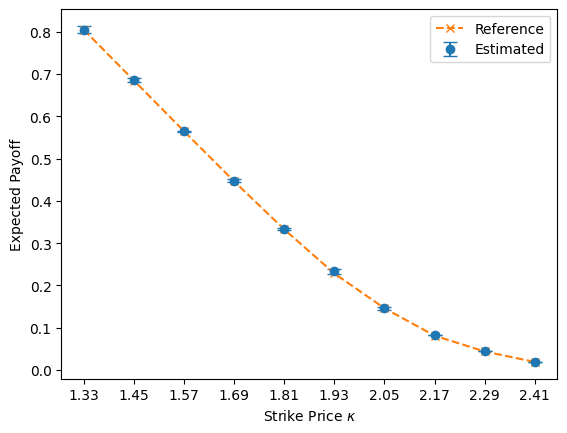

In [23]:
import matplotlib.pyplot as plt

plt.errorbar(strike_prices, estimated_values, yerr=np.array(y_err).T, fmt='o', capsize=5, label='Estimated')
plt.plot(strike_prices, exact_values, 'x--', label="Reference")
plt.xlabel(r'Strike Price $\kappa$')
plt.ylabel("Expected Payoff")
plt.legend()

## Call-on-min

In [24]:
import numpy as np
import json

with open('data/2024-04-01/call_on_min_2024-04-01-21:30:16.json', 'r') as f:
    data = json.load(f)

strike_prices = list(data.keys())
estimated_values = []
exact_values = []
conf_int = []
y_err = []
for key, value in data.items():
    curr_results = value['results']
    curr_exact_value = curr_results[0][0]
    curr_estimated_value = curr_results[0][1]
    curr_lower_bound = curr_results[0][2]
    curr_upper_bound=  curr_results[0][3]
    estimated_values.append(curr_estimated_value)
    exact_values.append(curr_exact_value)
    conf_int.append([curr_lower_bound, curr_upper_bound])
    y_err.append([curr_estimated_value - curr_lower_bound, curr_upper_bound - curr_estimated_value])

for i in range(len(strike_prices)):
    print(strike_prices[i], end='&')
    print('{:.6f}'.format(exact_values[i]), end='&')
    print('{:.6f}'.format(estimated_values[i]), end='&')
    print('{:.6f}'.format(conf_int[i][1]), end='&')
    print('{:.6f}'.format(conf_int[i][0]), end='\\\\')
    print()

1.33&0.549242&0.549779&0.556598&0.542961\\
1.45&0.429959&0.429376&0.437922&0.420830\\
1.57&0.315390&0.313495&0.319649&0.307340\\
1.69&0.207789&0.208521&0.209452&0.207590\\
1.81&0.127052&0.128095&0.129009&0.127182\\
1.93&0.061264&0.072553&0.073112&0.071993\\
2.05&0.030753&0.031998&0.032863&0.031132\\
2.17&0.009879&0.011256&0.012077&0.010435\\
2.29&0.004124&0.005356&0.005689&0.005022\\
2.41&0.000863&0.001378&0.001902&0.000854\\


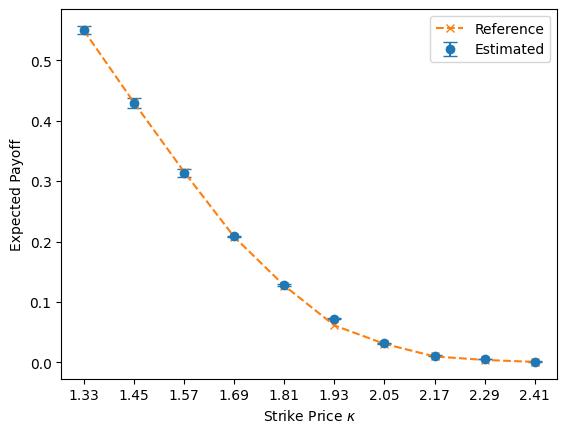

In [26]:
import matplotlib.pyplot as plt

plt.errorbar(strike_prices, estimated_values, yerr=np.array(y_err).T, fmt='o', capsize=5, label='Estimated')
plt.plot(strike_prices, exact_values, 'x--', label="Reference")
plt.xlabel(r'Strike Price $\kappa$')
plt.ylabel("Expected Payoff")
plt.legend()

## Best-of-call options

### Sliced view

In [39]:
import numpy as np
import json

with open('data/2024-04-04/best_of_call/best_of_call_2024-04-04-15:03:18.json', 'r') as f:
    data = json.load(f)

strike_prices = list(data.keys())
estimated_values = []
exact_values = []
conf_int = []
y_err = []

fixed_strike_price = list(data[strike_prices[0]].keys())[0]

first_slice_estimated_values = []
first_slice_exact_values = []
first_slice_conf_int = []
first_slice_y_err = []
strike_price_2 = fixed_strike_price
for strike_price_1 in strike_prices:
    curr_results = data[strike_price_1][strike_price_2]["results"]

    curr_exact_value = curr_results[0][0]
    best_int_index = 0
    best_int = curr_results[0][3] - curr_results[0][2]
    best_data_index = 0
    for i in range(3):
        curr_int = curr_results[i][3] - curr_results[i][2]
        if (curr_results[i][3] > curr_exact_value and curr_results[i][2] < curr_exact_value):
            best_int = curr_int
            best_int_index = i
    
    # for j in range(3):
    #     curr_int = curr_results_2[i][3] - curr_results_2[i][2]
    #     if curr_int < best_int and (curr_results_2[i][3] > curr_exact_value and curr_results_2[i][2] < curr_exact_value):
    #         best_int = curr_int
    #         best_int_index = i
    #         best_data_index = 1
    
    curr_estimated_value = curr_results[best_int_index][1]
    curr_lower_bound = curr_results[best_int_index][2]
    curr_upper_bound=  curr_results[best_int_index][3]
    first_slice_estimated_values.append(curr_estimated_value)
    first_slice_exact_values.append(curr_exact_value)
    first_slice_conf_int.append([curr_lower_bound, curr_upper_bound])
    first_slice_y_err.append([curr_estimated_value - curr_lower_bound, curr_upper_bound - curr_estimated_value])
    
first_slice_lower_bounds = [x[0] for x in first_slice_conf_int]
first_slice_upper_bounds = [x[1] for x in first_slice_conf_int]

second_slice_estimated_values = []
second_slice_exact_values = []
second_slice_conf_int = []
second_slice_y_err = []
strike_price_1 = fixed_strike_price

for strike_price_2 in strike_prices:
    curr_results = data[strike_price_1][strike_price_2]["results"]
    curr_exact_value = curr_results[0][0]
    best_int_index = 0
    best_int = curr_results[0][3] - curr_results[0][2]
    for i in range(3):
        curr_int = curr_results[i][3] - curr_results[i][2]
        if (curr_results[i][3] > curr_exact_value and curr_results[i][2] < curr_exact_value):
            best_int = curr_int
            best_int_index = i
    curr_estimated_value = curr_results[best_int_index][1]
    curr_lower_bound = curr_results[best_int_index][2]
    curr_upper_bound=  curr_results[best_int_index][3]
    second_slice_estimated_values.append(curr_estimated_value)
    second_slice_exact_values.append(curr_exact_value)
    second_slice_conf_int.append([curr_lower_bound, curr_upper_bound])
    second_slice_y_err.append([curr_estimated_value - curr_lower_bound, curr_upper_bound - curr_estimated_value])
    

second_slice_lower_bounds = [x[0] for x in second_slice_conf_int]
second_slice_upper_bounds = [x[1] for x in second_slice_conf_int]
# print(lower_bounds)

strike_prices = [float(x) for x in data.keys()]

for i in range(len(strike_prices)):
    print(strike_prices[i], end='&')
    print('{:.6f}'.format(first_slice_exact_values[i]), end='&')
    print('{:.6f}'.format(first_slice_estimated_values[i]), end='&')
    print('{:.6f}'.format(first_slice_conf_int[i][1]), end='&')
    print('{:.6f}'.format(first_slice_conf_int[i][0]), end='\\\\')
    print()
    
print()

for i in range(len(strike_prices)):
    print(strike_prices[i], end='&')
    print('{:.6f}'.format(second_slice_exact_values[i]), end='&')
    print('{:.6f}'.format(second_slice_estimated_values[i]), end='&')
    print('{:.6f}'.format(second_slice_conf_int[i][1]), end='&')
    print('{:.6f}'.format(second_slice_conf_int[i][0]), end='\\\\')
    print()


1.74&0.317163&0.318514&0.324408&0.312619\\
1.8&0.275635&0.270604&0.280077&0.261131\\
1.85&0.246069&0.239256&0.248482&0.230031\\
1.9&0.217595&0.215355&0.223858&0.206853\\
1.96&0.193578&0.195811&0.203952&0.187671\\
2.01&0.173564&0.172656&0.183125&0.162187\\
2.06&0.159330&0.155583&0.161787&0.149379\\
2.12&0.142249&0.131429&0.142335&0.120523\\
2.17&0.134635&0.136207&0.145155&0.127260\\
2.22&0.127487&0.127613&0.136500&0.118725\\

1.74&0.317163&0.313921&0.320802&0.307041\\
1.8&0.275635&0.272590&0.279893&0.265287\\
1.85&0.246069&0.246159&0.255350&0.236968\\
1.9&0.217595&0.211263&0.219560&0.202967\\
1.96&0.193578&0.185910&0.194768&0.177052\\
2.01&0.173564&0.172656&0.183125&0.162187\\
2.06&0.159330&0.158481&0.167939&0.149024\\
2.12&0.142249&0.132845&0.143750&0.121939\\
2.17&0.134635&0.129799&0.134710&0.124888\\
2.22&0.127487&0.128737&0.139493&0.117981\\


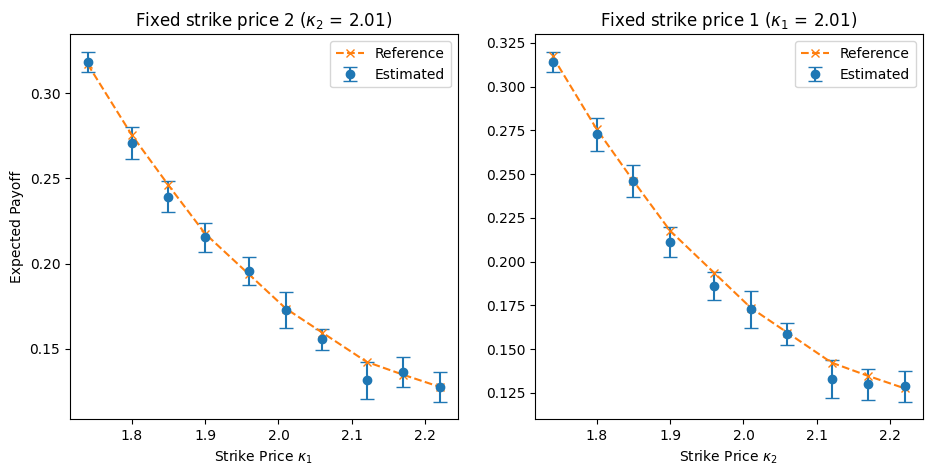

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(11, 5))
ax[0].errorbar(strike_prices, first_slice_estimated_values, yerr=np.array(first_slice_y_err).T, capsize=5, fmt='o', label='Estimated')
ax[0].plot(strike_prices, first_slice_exact_values, 'x--', label="Reference")
ax[0].set_xlabel(r'Strike Price $\kappa_1$')
ax[0].set_title('Fixed strike price 2 ($\kappa_2$ = {})'.format(fixed_strike_price))
ax[0].set_ylabel('Expected Payoff')
ax[0].legend()

ax[1].errorbar(strike_prices, second_slice_estimated_values,  yerr=np.array(first_slice_y_err).T, capsize=5, fmt='o', label='Estimated')
ax[1].plot(strike_prices, second_slice_exact_values, 'x--', label="Reference")
ax[1].set_title('Fixed strike price 1 ($\kappa_1$ = {})'.format(fixed_strike_price))
ax[1].set_xlabel(r'Strike Price $\kappa_2$')
ax[1].legend()

In [13]:
import numpy as np
import json

with open('data/2024-04-03/best_of_call/best_of_call_2024-04-03-22:08:47.json', 'r') as f:
    data = json.load(f)

with open('data/2024-04-03/best_of_call/best_of_call_2024-04-03-18:33:44.json', 'r') as f:
    data2 = json.load(f)

with open("data/2024-04-02/best_of_call/best_of_call_2024-04-02-16:48:45.json", 'r') as f:
    data3 = json.load(f)

def process_data(data, index):
    strike_prices = list(data.keys())
    fixed_strike_price = list(data[strike_prices[0]].keys())[0]
    first_slice_estimated_values = []
    first_slice_exact_values = []
    first_slice_conf_int = []
    first_slice_y_err = []
    strike_price_2 = fixed_strike_price
    for strike_price_1 in strike_prices:
        curr_results = data[strike_price_1][strike_price_2]["results"]
        curr_exact_value = curr_results[index][0]
        curr_estimated_value = curr_results[index][1]
        curr_lower_bound = curr_results[index][2]
        curr_upper_bound=  curr_results[index][3]
        first_slice_estimated_values.append(curr_estimated_value)
        first_slice_exact_values.append(curr_exact_value)
        first_slice_conf_int.append([curr_lower_bound, curr_upper_bound])
        first_slice_y_err.append([curr_estimated_value - curr_lower_bound, curr_upper_bound - curr_estimated_value])
        
    # first_slice_lower_bounds = [x[0] for x in first_slice_conf_int]
    # first_slice_upper_bounds = [x[1] for x in first_slice_conf_int]

    second_slice_estimated_values = []
    second_slice_exact_values = []
    second_slice_conf_int = []
    second_slice_y_err = []
    strike_price_1 = fixed_strike_price

    for strike_price_2 in strike_prices:
        curr_results = data[strike_price_1][strike_price_2]["results"]
        curr_exact_value = curr_results[index][0]
        curr_estimated_value = curr_results[index][1]
        curr_lower_bound = curr_results[index][2]
        curr_upper_bound=  curr_results[index][3]
        second_slice_estimated_values.append(curr_estimated_value)
        second_slice_exact_values.append(curr_exact_value)
        second_slice_conf_int.append([curr_lower_bound, curr_upper_bound])
        second_slice_y_err.append([curr_estimated_value - curr_lower_bound, curr_upper_bound - curr_estimated_value])
        
    strike_prices = [float(x) for x in data.keys()]
    return first_slice_estimated_values, first_slice_exact_values, first_slice_conf_int, first_slice_y_err, second_slice_estimated_values, second_slice_exact_values, second_slice_conf_int, second_slice_y_err, strike_prices


output_1 = process_data(data, 0)
output_2 = process_data(data, 1)
output_3 = process_data(data, 2)
output_4 = process_data(data2, 0)
output_5 = process_data(data2, 1)
output_6 = process_data(data2, 2)
output_7 = process_data(data3, 0)
output_8 = process_data(data3, 1)
output_9 = process_data(data3, 2)

# unpacking
first_slice_estimated_values, first_slice_exact_values, first_slice_conf_int, first_slice_y_err, second_slice_estimated_values, second_slice_exact_values, second_slice_conf_int, second_slice_y_err, strike_prices = output_1
first_slice_estimated_values_2, first_slice_exact_values_2, first_slice_conf_int_2, first_slice_y_err_2, second_slice_estimated_values_2, second_slice_exact_values_2, second_slice_conf_int_2, second_slice_y_err_2, strike_prices = output_2
first_slice_estimated_values_3, first_slice_exact_values_3, first_slice_conf_int_3, first_slice_y_err_3, second_slice_estimated_values_3, second_slice_exact_values_3, second_slice_conf_int_3, second_slice_y_err_3, strike_prices = output_3
first_slice_estimated_values_4, first_slice_exact_values_4, first_slice_conf_int_4, first_slice_y_err_4, second_slice_estimated_values_4, second_slice_exact_values_4, second_slice_conf_int_4, second_slice_y_err_4, strike_prices = output_4
first_slice_estimated_values_5, first_slice_exact_values_5, first_slice_conf_int_5, first_slice_y_err_5, second_slice_estimated_values_5, second_slice_exact_values_5, second_slice_conf_int_5, second_slice_y_err_5, strike_prices = output_5
first_slice_estimated_values_6, first_slice_exact_values_6, first_slice_conf_int_6, first_slice_y_err_6, second_slice_estimated_values_6, second_slice_exact_values_6, second_slice_conf_int_6, second_slice_y_err_6, strike_prices = output_6
first_slice_estimated_values_7, first_slice_exact_values_7, first_slice_conf_int_7, first_slice_y_err_7, second_slice_estimated_values_7, second_slice_exact_values_7, second_slice_conf_int_7, second_slice_y_err_7, strike_prices = output_7
first_slice_estimated_values_8, first_slice_exact_values_8, first_slice_conf_int_8, first_slice_y_err_8, second_slice_estimated_values_8, second_slice_exact_values_8, second_slice_conf_int_8, second_slice_y_err_8, strike_prices = output_8
first_slice_estimated_values_9, first_slice_exact_values_9, first_slice_conf_int_9, first_slice_y_err_9, second_slice_estimated_values_9, second_slice_exact_values_9, second_slice_conf_int_9, second_slice_y_err_9, strike_prices = output_9

Text(0.5, 0, 'Strike Price $\\kappa_2$')

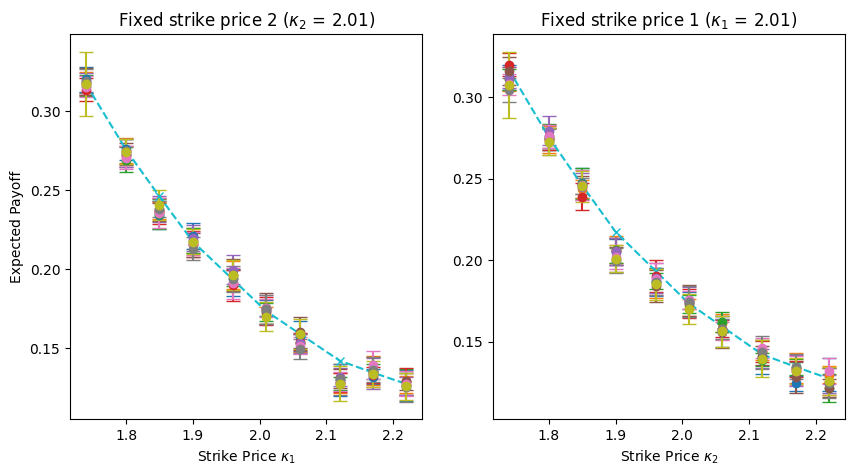

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].errorbar(strike_prices, first_slice_estimated_values, yerr=np.array(first_slice_y_err).T, capsize=5, fmt='o', label='Estimated')
ax[0].errorbar(strike_prices, first_slice_estimated_values_2, yerr=np.array(first_slice_y_err_2).T, capsize=5, fmt='o', label='Estimated 2')
ax[0].errorbar(strike_prices, first_slice_estimated_values_3, yerr=np.array(first_slice_y_err_3).T, capsize=5, fmt='o', label='Estimated 3')
ax[0].errorbar(strike_prices, first_slice_estimated_values_4, yerr=np.array(first_slice_y_err_4).T, capsize=5, fmt='o', label='Estimated 4')
ax[0].errorbar(strike_prices, first_slice_estimated_values_5, yerr=np.array(first_slice_y_err_5).T, capsize=5, fmt='o', label='Estimated 5')
ax[0].errorbar(strike_prices, first_slice_estimated_values_6, yerr=np.array(first_slice_y_err_6).T, capsize=5, fmt='o', label='Estimated 6')
ax[0].errorbar(strike_prices, first_slice_estimated_values_7, yerr=np.array(first_slice_y_err_7).T, capsize=5, fmt='o', label='Estimated 7')
ax[0].errorbar(strike_prices, first_slice_estimated_values_8, yerr=np.array(first_slice_y_err_8).T, capsize=5, fmt='o', label='Estimated 8')
ax[0].errorbar(strike_prices, first_slice_estimated_values_9, yerr=np.array(first_slice_y_err_9).T, capsize=5, fmt='o', label='Estimated 9')
ax[0].plot(strike_prices, first_slice_exact_values, 'x--', label="Exact")
ax[0].set_xlabel(r'Strike Price $\kappa_1$')
ax[0].set_title('Fixed strike price 2 ($\kappa_2$ = {})'.format(fixed_strike_price))
ax[0].set_ylabel('Expected Payoff')

ax[1].errorbar(strike_prices, second_slice_estimated_values,  yerr=np.array(first_slice_y_err).T, capsize=5, fmt='o', label='Estimated')
ax[1].errorbar(strike_prices, second_slice_estimated_values_2,  yerr=np.array(first_slice_y_err_2).T, capsize=5, fmt='o', label='Estimated 2')
ax[1].errorbar(strike_prices, second_slice_estimated_values_3,  yerr=np.array(first_slice_y_err_3).T, capsize=5, fmt='o', label='Estimated 3')
ax[1].errorbar(strike_prices, second_slice_estimated_values_4,  yerr=np.array(first_slice_y_err_4).T, capsize=5, fmt='o', label='Estimated 4')
ax[1].errorbar(strike_prices, second_slice_estimated_values_5,  yerr=np.array(first_slice_y_err_5).T, capsize=5, fmt='o', label='Estimated 5')
ax[1].errorbar(strike_prices, second_slice_estimated_values_6,  yerr=np.array(first_slice_y_err_6).T, capsize=5, fmt='o', label='Estimated 6')
ax[1].errorbar(strike_prices, second_slice_estimated_values_7,  yerr=np.array(first_slice_y_err_7).T, capsize=5, fmt='o', label='Estimated 7')
ax[1].errorbar(strike_prices, second_slice_estimated_values_8,  yerr=np.array(first_slice_y_err_8).T, capsize=5, fmt='o', label='Estimated 8')
ax[1].errorbar(strike_prices, second_slice_estimated_values_9,  yerr=np.array(first_slice_y_err_9).T, capsize=5, fmt='o', label='Estimated 9')

ax[1].plot(strike_prices, second_slice_exact_values, 'x--', label="Exact")
ax[1].set_title('Fixed strike price 1 ($\kappa_1$ = {})'.format(fixed_strike_price))
ax[1].set_xlabel(r'Strike Price $\kappa_2$')

# MLAE

In [6]:
import numpy as np
import json

with open('data/best_of_call_test_2024-03-26-23:53:15.json', 'r') as f:
    data = json.load(f)

strike_prices = list(data.keys())
estimated_values = []
exact_values = []
conf_int = []
y_err = []

first_slice_estimated_values = []
first_slice_exact_values = []
first_slice_conf_int = []
first_slice_y_err = []
strike_price_2 = strike_prices[5]
for strike_price_1 in strike_prices:

    curr_results = data[strike_price_1][strike_price_2]["results"]
    curr_exact_value = curr_results[0]
    curr_estimated_value = curr_results[1]
    curr_lower_bound = curr_results[2]
    curr_upper_bound=  curr_results[3]
    first_slice_estimated_values.append(curr_estimated_value)
    first_slice_exact_values.append(curr_exact_value)
    first_slice_conf_int.append([curr_lower_bound, curr_upper_bound])
    first_slice_y_err.append([curr_estimated_value - curr_lower_bound, curr_upper_bound - curr_estimated_value])
    
first_slice_lower_bounds = [x[0] for x in first_slice_conf_int]
first_slice_upper_bounds = [x[1] for x in first_slice_conf_int]

second_slice_estimated_values = []
second_slice_exact_values = []
second_slice_conf_int = []
second_slice_y_err = []
strike_price_1 = strike_prices[5]

for strike_price_2 in strike_prices:
    curr_results = data[strike_price_1][strike_price_2]["results"]
    curr_exact_value = curr_results[0]
    curr_estimated_value = curr_results[1]
    curr_lower_bound = curr_results[2]
    curr_upper_bound=  curr_results[3]
    second_slice_estimated_values.append(curr_estimated_value)
    second_slice_exact_values.append(curr_exact_value)
    second_slice_conf_int.append([curr_lower_bound, curr_upper_bound])
    second_slice_y_err.append([curr_estimated_value - curr_lower_bound, curr_upper_bound - curr_estimated_value])
    

second_slice_lower_bounds = [x[0] for x in second_slice_conf_int]
second_slice_upper_bounds = [x[1] for x in second_slice_conf_int]
# print(lower_bounds)

strike_prices = [float(x) for x in data.keys()]
print(strike_prices)

[1.74, 1.8, 1.85, 1.9, 1.96, 2.01, 2.06, 2.12, 2.17, 2.22]


Text(0.5, 0, 'Strike Price')

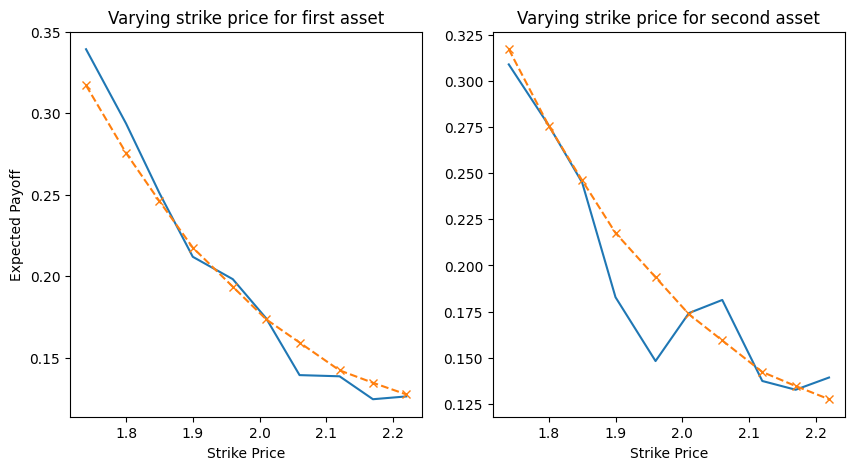

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(strike_prices, first_slice_estimated_values, label='Estimated')
ax[0].plot(strike_prices, first_slice_exact_values, 'x--', label="Exact")
ax[0].set_xlabel('Strike Price')
ax[0].set_title('Varying strike price for first asset')
ax[0].set_ylabel('Expected Payoff')

ax[1].plot(strike_prices, second_slice_estimated_values, label='Estimated')
ax[1].plot(strike_prices, second_slice_exact_values, 'x--', label="Exact")
ax[1].set_title('Varying strike price for second asset')
ax[1].set_xlabel('Strike Price')